<a href="https://colab.research.google.com/github/ychencq/ECE-246-Stat-Machine-Learning/blob/main/Project1/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# Section \#1: Centralized Algorithms

## Section \#1.1: LINEAR REGRESSION

Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('drive/Shared drives/ECE 246/')

Mounted at /content/drive


['Code', 'Code_Jingjing', 'Code_Chenhao', 'Code_ddh', 'REPORT_.gdoc']

In [ ]:
import sys
sys.path.append('drive/Shared drives/ECE 246/Code')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from data_load import load
import scipy.io as io
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('regression_train.csv')
    X_val, y_val = load('regression_val.csv')
    X_test, y_test = load('regression_test.csv')
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Validation data shape: ',X_val.shape)
print('Validation target shape: ',y_val.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (20, 1)
Train target shape:  (20,)
Validation data shape:  (20, 1)
Validation target shape:  (20,)
Test data shape:  (20, 1)
Test target shape:  (20,)


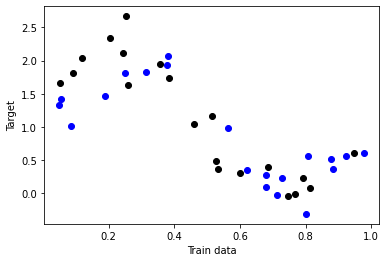

In [ ]:
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

### Training Linear Regression

In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [ ]:
from Regression import Regression

In [ ]:
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print(loss)
print(grad)
##

2.01169237048355
-0.6736623321581


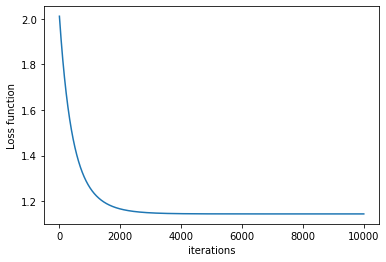

[[0.44686534]
 [0.44686534]]
1.1441824572702652


In [ ]:
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=20, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print(loss_history[9999])

In [ ]:
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print(loss_2)
print(w_2)

0.19562882028957315
[ 2.44640709 -2.81635359]


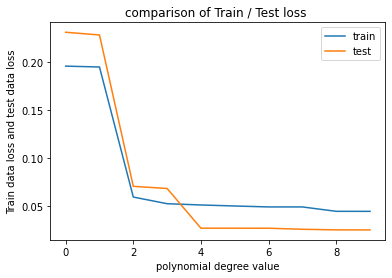

In [ ]:
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
train_l=[]
test_l=[]
for i in np.arange(1,11):
    regression_x = Regression(i, reg_param=0)
    train_loss,train_w = regression_x.closed_form(X_train,y_train)
    train_l.append(train_loss)
    test_loss,test_w = regression_x.closed_form(X_test,y_test)
    test_l.append(test_loss)

plt.plot(train_l,label='train')
plt.plot(test_l,label='test')
plt.legend();

plt.xlabel('polynomial degree value')
plt.ylabel('Train data loss and test data loss')
plt.title('comparison of Train / Test loss ')
plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #



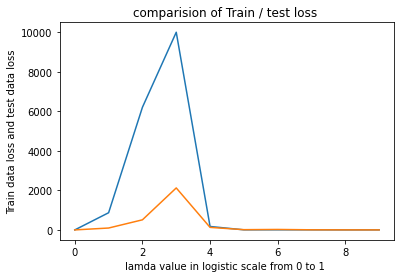

In [ ]:
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for lambda from set of values given.
# ================================================================ #
reg_params = [0,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
Train_l=[]
Test_l=[]
for reg in reg_params:
    regression_xx = Regression(10, reg_param=reg)
    train_loss,train_w = regression_xx.closed_form(X_train,y_train)
    Train_l.append(train_loss)
    test_loss,test_w = regression_xx.closed_form(X_test,y_test)
    Test_l.append(test_loss)
plt.plot(Train_l,label='train')
plt.plot(Test_l,label='test')
#plt.semilogx([reg_params],[Train_l])
plt.xlabel('lamda value in logistic scale from 0 to 1 ')
plt.ylabel('Train data loss and test data loss')
plt.title('comparision of Train / test loss ')
plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Section \#1.2: Binary Classification 

Please follow our instructions in the same order to solve the binary classification problem.

Please print out the entire results and codes when completed.

In [ ]:
"""
Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
"""
train = io.loadmat('drive/Shared drives/ECE 246/Code/mnist_train')
test = io.loadmat('drive/Shared drives/ECE 246/Code/mnist_test')
X_train = train['X_train']
y_train = np.transpose(train['y_train'])
X_test = test['X_test']
y_test = np.transpose(test['y_test'])

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)


Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


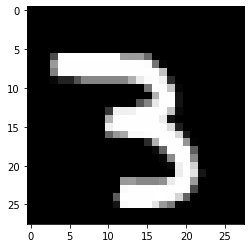

label is 3


In [ ]:
# To Visualize a point in the dataset
index = 4000
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('Sample.pdf')
if y_train[index] == 1:
    label = 3
else:
    label = 2
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

In [ ]:
N = X_train.shape[0] # Number of data point
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d,1))
# ================================================================ #
# YOUR CODE HERE:
# Implement the perceptron Algorithm and compute the number of misclassified points at each training step
# ================================================================ #
iter = N
for _ in range(iter):
  error = 0
  for inputs, label in zip(X_train, y_train):
    predict = np.dot(W.T,inputs.T)
    # print(predict)
    # print(label*predict)
    judge = label*predict
    if judge[0]<=0:
      # print("in")
      error = error + 1
      update = (label*inputs).reshape(-1,1)
      W = W+update
  loss_hist.append(error)

  
print(loss_hist[4999])
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

0


In [ ]:

print(np.linalg.norm(W,ord=2))
print(loss_hist[4999])

421741.3164879628
0


0


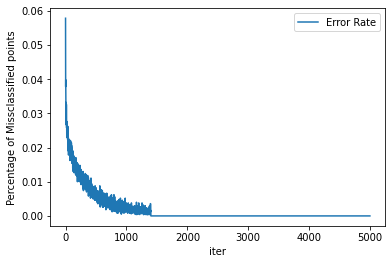

In [ ]:
# Compute the percentage of misclassified points in the test data for perceptron




print(loss_hist[4999])
error_rate = [loss/N for loss in loss_hist]
fig = plt.figure()
plt.plot(error_rate, label='Error Rate')
plt.legend()
plt.xlabel("iter")
plt.ylabel("Percentage of Missclassified points")
plt.show()

## Train Logistic Regression

In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent. 

In [ ]:
from Logistic import Logistic

In [ ]:
# Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599454
78885.26903007


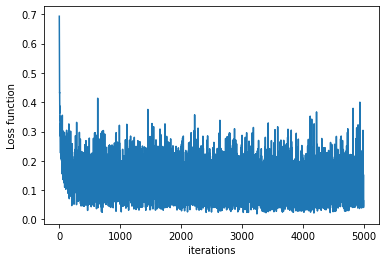

0.00019980738370628065
0.1505163607426023


In [ ]:
# Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=50, num_iters=5000)

fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('LR_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[4999])

In [ ]:
# Complete predict function in Logisitc.py file and compute the percentage of misclassified points in the test data


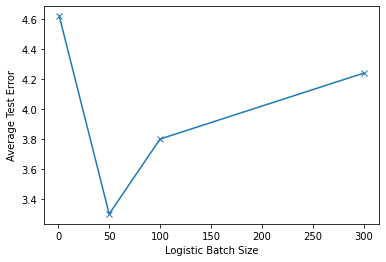

In [ ]:
Batch = [1, 50 , 100, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size Avergae the test error over 10 times
# ================================================================ #
for t in range (0,10):
    for m in range(0,len(Batch)):
      N,d = X_train.shape
      logistic = Logistic(d=d, reg_param=0)
      logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=Batch[m], num_iters=8000//Batch[m])
      y_pred = logistic.predict(X_test)
      y_pred = y_pred.reshape(y_test.shape)
      test_err[m] += np.sum((y_test!=y_pred))*100/X_test.shape[0]

test_err = test_err/10
plt.figure()
plt.plot(Batch,test_err,'-x')
plt.xlabel('Logistic Batch Size')
plt.ylabel('Average Test Error')
plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #



## Train SVM

In the following cells, you will build SVM. You will implement its loss function, then subsequently train it with mini-batch gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the best regularization parameter.

In [ ]:
from SVM import SVM

In [ ]:
# Complete loss_and_grad function in SVM.py file and test your results.
N,d = X_train.shape
svm = SVM(d=d, reg_param=0)
loss, grad = svm.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 1.0
315541.07612028


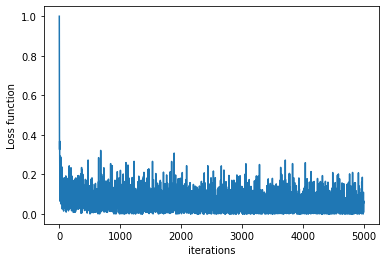

0.00020554197167599997
0.0562364052000001


In [ ]:
# Complete train_svm function in SVM.py file 
loss_history, w = svm.train_svm(X_train,y_train, eta=1e-6,batch_size=50, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('svm_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[4999])

In [ ]:
# Complete predict function in SVM.py file and compute the percentage of misclassified points in the test data
y_pred = svm.predict(X_test)
y_pred = y_pred.reshape(y_test.shape)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err)

2.6


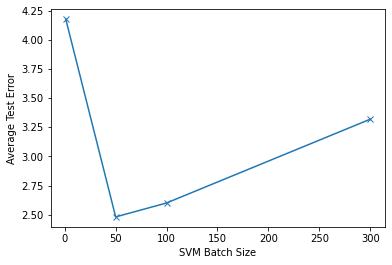

In [ ]:
Batch = [1, 50 , 100, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the SVM for different batch size Avergae the test error over 10 times
# ================================================================ #
for t in range (0,10):
    for m in range(0,len(Batch)):
      N,d = X_train.shape
      svm = SVM(d=d, reg_param=0)
      svm.train_svm(X_train,y_train, eta=1e-6,batch_size=Batch[m], num_iters=8000//Batch[m])
      y_pred = svm.predict(X_test)
      y_pred = y_pred.reshape(y_test.shape)
      test_err[m] += np.sum((y_test!=y_pred))*100/X_test.shape[0]

test_err = test_err/10
plt.figure()
plt.plot(Batch,test_err,'-x')
plt.xlabel('SVM Batch Size')
plt.ylabel('Average Test Error')
plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

# Section \#1.3: Multi-Class Logistic Regression and Adaboost 

Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [ ]:
pip install python-mnist

In [ ]:
from data_loadM import load_mnist
X_train,X_test,y_train,y_test=load_mnist()
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (60000, 784)
Train target shape:  (60000,)
Test data shape:  (10000, 784)
Test target shape:  (10000,)


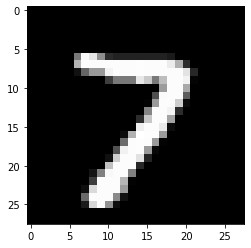

label is 7


In [ ]:
# To Visualize a point in the dataset
index = 4000
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('Sample.pdf')
print('label is', y_train[index])

## Train Multi-Class Logistic Regression

In the following cells, you will build a Multi-Class logistic regression. You will implement its loss function, then subsequently train it with gradient descent. You will implement L1 norm regularization, and choose the best regularization parameter.

In [ ]:
from MLogistic import MLogistic

In [ ]:
## Complete loss_and_grad function in Logistic.py file and test your results.
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

mlogistic = MLogistic(dim=[num_classes,num_features], reg_param=0)
loss, grad = mlogistic.loss_and_grad(X_train[:5000],y_train[:5000])
print('Loss function=',loss)
print('Frobenius norm of grad=',np.linalg.norm(grad))
##

Loss function= 2.3025850929939837
Frobenius norm of grad= 269.57149388566296


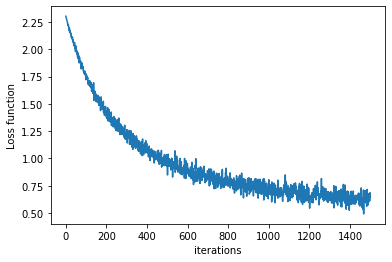

0.013277720712790339
0.6451192316495884


In [ ]:
## Complete train_LR function in Logistic.py file 
loss_history, w = mlogistic.train_LR(X_train,y_train, eta=1e-7,batch_size=200, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(np.linalg.norm(w))
print(loss_history[1499])

In [ ]:
# ================================================================ #
# YOUR CODE HERE:
#Complete predict function in Logistic.py file and compute the training error and the test error
# ================================================================ #
y_pred_train = mlogistic.predict(X_train)
y_pred_train = y_pred_train.reshape(y_train.shape)
train_err = np.sum((y_train!=y_pred_train))*100/X_train.shape[0]
print("train error rate",train_err,"%")
y_pred_test = mlogistic.predict(X_test)
y_pred_test = y_pred_test.reshape(y_test.shape)
test_err = np.sum((y_test!=y_pred_test))*100/X_test.shape[0]
print("test error rate",test_err,"%")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


train error rate 14.035 %
test error rate 12.99 %


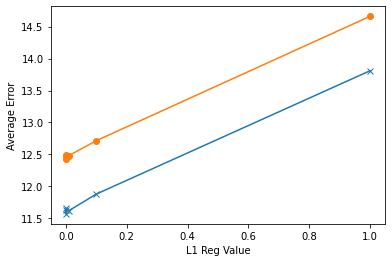

In [ ]:
reg = [0,1e-6,1e-3,1e-2,1e-1,1]
train_err =np.zeros((len(reg),1))
test_err =np.zeros((len(reg),1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
for m in range(0,len(reg)):
  mlogistic = MLogistic(dim=[num_classes,num_features], reg_param=0)
  loss_history, w = mlogistic.train_LR_l1(X_train,y_train, reg = reg[m], eta=1e-7,batch_size=200, num_iters=3000)
  y_pred_train = mlogistic.predict(X_train)
  y_pred_train = y_pred_train.reshape(y_train.shape)
  train_error = np.sum((y_train!=y_pred_train))*100/X_train.shape[0]
  train_err[m] = train_error
  # print("train error rate",train_err,"%")
  y_pred_test = mlogistic.predict(X_test)
  y_pred_test = y_pred_test.reshape(y_test.shape)
  test_error = np.sum((y_test!=y_pred_test))*100/X_test.shape[0]
  test_err[m] = test_error
  # print("test error rate",test_err,"%")

plt.figure()
plt.plot(reg,test_err,'-x')
plt.plot(reg,train_err,'-o')
plt.xlabel('L1 Reg Value')
plt.ylabel('Average Error')
plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


In [ ]:
print(test_err)

[[11.63]
 [11.57]
 [11.66]
 [11.62]
 [11.88]
 [13.81]]


In [ ]:
pip install -U scikit-learn #scipy matplotlib

     |████████████████████████████████| 22.2MB 57.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
T = 200
N = X_train.shape[0]
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
train_err = np.zeros((T,1))
test_err = np.zeros((T,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# as a function of number of classifiers T for Adaboost Algorithm. 
# ================================================================ #

#Initialize
D = np.ones(N)/N
aplhas = np.ones(T)
trees = []
train_pred = np.zeros((N,num_classes))
test_pred = np.zeros((X_test.shape[0],num_classes))
for t in range(0,T):
    #Train decision Tree
    tree = DecisionTreeClassifier(max_depth = 4)
    tree.fit(X_train, y_train, sample_weight = D)  
    #Compute error
    train_pred_t = tree.predict(X_train)
    equals = train_pred_t-y_train
    wrongs = np.where(equals == 0,0,1)
    weight_wrongs = D*wrongs
    errm = np.sum(weight_wrongs)
    # train_error = np.sum((y_train!=train_pred))*100/X_train.shape[0]
    # test_pred = tree.predict(X_test)
    # test_error = np.sum((y_test!=test_pred))*100/X_test.shape[0]
    # train_err[t][0] = train_error
    # test_err[t][0] = test_error
    #Compute \alpha
    aplhas[t] = np.log((1-errm)/errm) + np.log(num_classes-1)
    #Update weights
    conditions = np.ones(N)
    D = D*np.exp(aplhas[t]*wrongs)
    sum_of_D = np.sum(D)
    D = D/sum_of_D
    #Predict using Last t classifiers
    for i in range(0,N):
      train_pred[i][train_pred_t[i]] += aplhas[t]

    test_pred_t = tree.predict(X_test)
    for i in range(0,X_test.shape[0]):
      test_pred[i][test_pred_t[i]] += aplhas[t]
    
    vote_t_train = np.argmax(train_pred, axis=1)
    vote_t_test = np.argmax(test_pred, axis=1)
    #compute test error and train error
    train_error = np.sum((y_train!=vote_t_train))*100/X_train.shape[0]
    test_error = np.sum((y_test!=vote_t_test))*100/X_test.shape[0]
    train_err[t] = train_error
    test_err[t] = test_error
# Plot test error and train error in the same plot vs T
plt.figure()
plt.plot(train_err,label = 'train error')
plt.plot(test_err,label = 'test error')
plt.xlabel("T")
plt.ylabel("Error")
plt.legend()
plt.show
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


[[40.43]
 [40.43]
 [35.7 ]
 [29.9 ]
 [26.45]
 [24.11]
 [22.09]
 [21.66]
 [20.09]
 [19.78]
 [18.59]
 [17.95]
 [17.58]
 [17.33]
 [16.78]
 [16.58]
 [16.64]
 [15.89]
 [15.75]
 [15.92]
 [15.77]
 [15.11]
 [14.93]
 [14.63]
 [14.28]
 [14.36]
 [14.2 ]
 [13.86]
 [13.98]
 [13.93]
 [13.68]
 [13.79]
 [13.59]
 [12.93]
 [12.83]
 [12.83]
 [12.92]
 [13.1 ]
 [12.59]
 [13.02]
 [12.75]
 [12.75]
 [12.95]
 [12.64]
 [12.36]
 [12.01]
 [11.76]
 [12.24]
 [11.79]
 [11.74]
 [11.7 ]
 [11.77]
 [12.06]
 [11.53]
 [11.54]
 [11.23]
 [11.38]
 [11.24]
 [11.34]
 [11.35]
 [11.28]
 [11.23]
 [11.15]
 [11.08]
 [11.02]
 [10.83]
 [10.73]
 [10.51]
 [10.52]
 [10.53]
 [10.33]
 [10.55]
 [10.3 ]
 [ 9.96]
 [10.14]
 [10.27]
 [10.14]
 [10.12]
 [10.28]
 [10.63]
 [10.54]
 [10.19]
 [ 9.86]
 [ 9.76]
 [ 9.77]
 [ 9.77]
 [ 9.82]
 [ 9.86]
 [10.06]
 [ 9.76]
 [ 9.65]
 [ 9.63]
 [ 9.89]
 [ 9.68]
 [ 9.77]
 [ 9.68]
 [ 9.55]
 [ 9.31]
 [ 9.18]
 [ 9.17]
 [ 9.17]
 [ 9.18]
 [ 9.13]
 [ 9.26]
 [ 9.3 ]
 [ 9.19]
 [ 9.18]
 [ 8.95]
 [ 9.13]
 [ 9.22]
 [ 9.06]
 

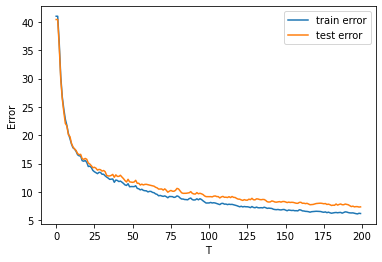

In [ ]:

plt.figure()
plt.plot(train_err,label = 'train error')
plt.plot(test_err,label = 'test error')
plt.xlabel("T")
plt.ylabel("Error")
plt.legend()
plt.show
print(test_err)

In [ ]:
print(test_err)

[[40.43]
 [40.43]
 [35.7 ]
 [29.9 ]
 [26.45]
 [24.11]
 [22.09]
 [21.66]
 [20.09]
 [19.78]
 [18.59]
 [17.95]
 [17.58]
 [17.33]
 [16.78]
 [16.58]
 [16.64]
 [15.89]
 [15.75]
 [15.92]
 [15.77]
 [15.11]
 [14.93]
 [14.63]
 [14.28]
 [14.36]
 [14.2 ]
 [13.86]
 [13.98]
 [13.93]
 [13.68]
 [13.79]
 [13.59]
 [12.93]
 [12.83]
 [12.83]
 [12.92]
 [13.1 ]
 [12.59]
 [13.02]
 [12.75]
 [12.75]
 [12.95]
 [12.64]
 [12.36]
 [12.01]
 [11.76]
 [12.24]
 [11.79]
 [11.74]
 [11.7 ]
 [11.77]
 [12.06]
 [11.53]
 [11.54]
 [11.23]
 [11.38]
 [11.24]
 [11.34]
 [11.35]
 [11.28]
 [11.23]
 [11.15]
 [11.08]
 [11.02]
 [10.83]
 [10.73]
 [10.51]
 [10.52]
 [10.53]
 [10.33]
 [10.55]
 [10.3 ]
 [ 9.96]
 [10.14]
 [10.27]
 [10.14]
 [10.12]
 [10.28]
 [10.63]
 [10.54]
 [10.19]
 [ 9.86]
 [ 9.76]
 [ 9.77]
 [ 9.77]
 [ 9.82]
 [ 9.86]
 [10.06]
 [ 9.76]
 [ 9.65]
 [ 9.63]
 [ 9.89]
 [ 9.68]
 [ 9.77]
 [ 9.68]
 [ 9.55]
 [ 9.31]
 [ 9.18]
 [ 9.17]
 [ 9.17]
 [ 9.18]
 [ 9.13]
 [ 9.26]
 [ 9.3 ]
 [ 9.19]
 [ 9.18]
 [ 8.95]
 [ 9.13]
 [ 9.22]
 [ 9.06]
 